# Exploratory data analysis and visualization with Python
![Python_pics](python_pics.jpg)

## What  are the main features of a car that dictates the price?
![cars_pics](car_pics2.JPG)

### What will be covered:
> * Data acquistion
> * Data wrangling
> * Exploratory data analysis


### Data acqusition stage
***Our data has already be prepared, just for us to import it to our machine***

This stage can be achieved by either: `web scraping`,`API request`, `File downloading from sources`

Get the data and its description [here](https://archive.ics.uci.edu/ml/datasets/Automobile)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

cars = pd.read_csv('import_85_data.txt',names=headers)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
print(f'The data has {cars.shape[0]} rows and {cars.shape[1]} columns')

The data has 205 rows and 26 columns


### Data wragling
***Transforming our data into a `ready-for-analysis` format***

In [6]:
# know the type of data types
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# get number of unique observation
cars.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [36]:
# set the display option to show all the columns
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows',None)

In [8]:
# get a descriptive summary of numeric values and put an eye on outlier and proportion
cars.describe(percentiles=[.01,.05,.1,.2,.4,.5,.7,.85,.95,.99])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
1%,-1.960000,88.408000,144.816000,62.536000,48.824000,1819.720000,70.000000,7.000000,14.040000,17.040000
5%,-1.000000,93.020000,157.140000,63.600000,49.700000,1901.000000,90.000000,7.500000,16.000000,22.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,8.000000,17.000000,23.000000
20%,0.000000,94.500000,165.300000,63.900000,51.400000,2048.000000,97.000000,8.500000,19.000000,24.800000
40%,0.000000,95.960000,171.500000,65.200000,53.000000,2333.400000,109.000000,9.000000,23.600000,29.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000


In [9]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


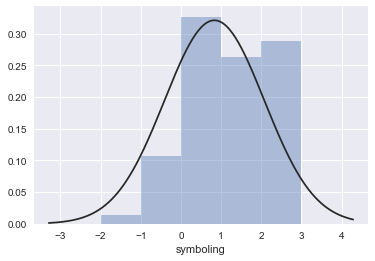

In [10]:
from scipy.stats import norm
sns.set(style="darkgrid")
ax = sns.distplot(cars.symboling,bins=5, fit=norm, kde=False)
sns.despine(left=True,bottom=True)

In [11]:
# get a descriptive summary of object type and categorical 
# and put an eye on recurring values, distinct values, wrong dtypes
cars.describe(include=['O','category'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [12]:
# take a look of the target variable (price)
cars.price.describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

In [13]:
# take a look at a fraction of the data for different instance to get a better overview
cars.sample(frac=.33,axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.20,76,6000,30,34,6529
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
38,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,9095
157,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.00,70,4800,30,37,7198
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,13415
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.30,116,4800,24,30,17669
87,1,125,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.50,116,5500,23,30,9279
177,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,11248


In [14]:
# check if there are duplicated rows (datapoint)
sum(cars.duplicated())

0

In [15]:
# get a dictionary of value counts to make a quick check for outlier, mistyped parameter, recurring values
dict_of_value_counts = {a:b.value_counts() for a,b in cars.items()}

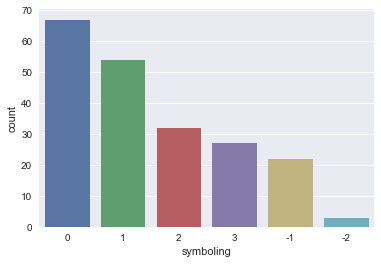

In [16]:

sns.set(style="darkgrid")
sns.countplot(x='symboling',data=cars,
             order=list(dict_of_value_counts['symboling'].index))
sns.despine(left=True,bottom=True)

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

As we can see, missing values appeared as question mark in the dataframe

In [18]:
# replace ? with null values
cars.replace('?',np.nan,inplace=True)

In [19]:
# check if the change has been effected
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [20]:
# obtain column with missing values,their dtypes and frequency
num_of_missing_values=cars.isnull().apply(lambda x:sum(x))

col_with_missing_values=num_of_missing_values.loc[num_of_missing_values>0]

[f'{a} : {cars[a].dtypes}: {num_of_missing_values[a]}' 
 for a in col_with_missing_values.index] 

['normalized-losses : object: 41',
 'num-of-doors : object: 2',
 'bore : object: 4',
 'stroke : object: 4',
 'horsepower : object: 2',
 'peak-rpm : object: 2',
 'price : object: 4']

In [21]:
# display it as a dataframe
col_with_missing_values=col_with_missing_values.to_frame(name='num_missing_val')
col_with_missing_values

,num_missing_val
normalized-losses,41
num-of-doors,2
bore,4
stroke,4
horsepower,2
peak-rpm,2
price,4


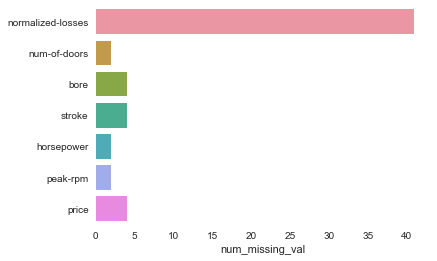

In [22]:
# make a visual chart
sns.set(style="white")
sns.barplot(x='num_missing_val',y=col_with_missing_values.index,
            data=col_with_missing_values,
             order=list(col_with_missing_values.index))
sns.despine(left=True,bottom=True)

In [23]:
# drop whole rows with a missing values for price and change dtypes
cars.dropna(subset=['price'], inplace=True)

cars.price=cars.price.astype(float)

In [24]:
# change other columns dtype to appropriate type and deal with missing values
for a in col_with_missing_values.index[:-1]:
    # only object type will be ignored
    cars[a]=pd.to_numeric(cars[a],errors='ignore')
## fill missing values in numeric type with mean value and that of object with the mode
    if cars[a].dtype == 'float64':
        cars[a].fillna((cars[a].mean()),axis=0,inplace=True)
    else:
        cars[a].fillna(cars[a].value_counts().idxmax()
                       ,axis=0,inplace=True)

In [25]:
# check if the change has been effected
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [26]:
# obtain the value of the categorical type that has the highest frequency
cars['num-of-doors'].value_counts().idxmax()

'four'

In [27]:
# re-check to confirmed the change
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-

In [28]:
cars.shape

(201, 26)

In [29]:
cars.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [30]:
## reset the index to default integer index
cars.reset_index(drop=True, inplace=True)

In [31]:
cars.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


 The fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit.
 
 $\frac{Litre}{100km} = \frac{235}{mpg}$

In [32]:
# standardizing the fuel consumption columns (city-mpg & highway-mpg)
# we shall  transform mpg into L/100km

cars['city_L/100km'] = 235/cars['city-mpg']
cars['highway_L/100km'] = 235/cars['highway-mpg']

In [33]:
cars.shape

(201, 28)

In [34]:
#normalization of some numeric data type in the range of [0,1]
for a in ['length','width','height']:
    cars[a] = cars[a]/cars[a].max()

In [37]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_L/100km,highway_L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


### Define a function to perform binning 

In [38]:
#Binning:
def binning(col, cut_points, labels=None):
    '''
    generates bins based on the conditions stated

     parameters
     ------------
     col: series,
     The series to bin into categories

     cut_points: int or list
     if int, it represent the number of bins with equal interval
     if list, it denotes the breaking point to categorize

     labels: list of strings
     name for each bin category

     ------
     return a series
     '''
  #Define min and max values:
    minval = col.min()
    maxval = col.max()
    if isinstance(cut_points,int):
        # if equal bins are needed
        bin_width = (maxval-minval)/(cut_points+1)
        bins = np.arange(minval,maxval,bin_width)
        #if no labels provided
        if not labels: labels = range(cut_points)
            
    else:
      # if cut_points are used for bins (unequal binwidth) 
      #create list by adding min and max to cut_points
        bins = [minval] + cut_points + [maxval]

      #if no labels provided, use default labels 0 ... (n-1)
        if not labels: labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
    colBin = pd.cut(col,bins=bins,labels=labels,include_lowest=True)
    return colBin


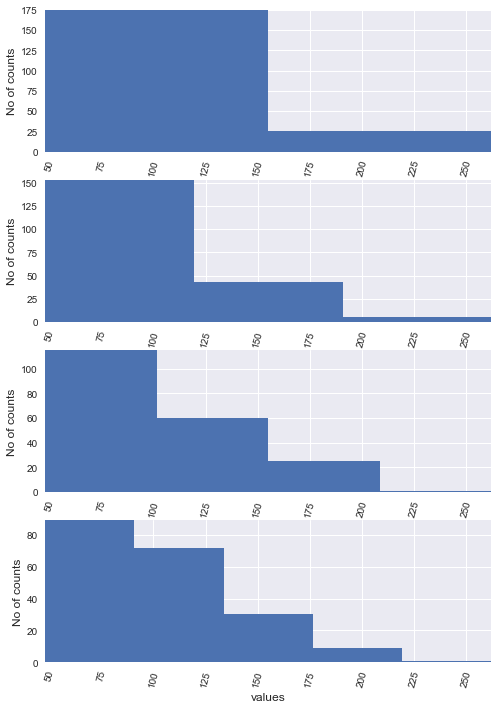

In [39]:
# experiment various bin before concluding to select a bin
fig=plt.figure(figsize=(8,12))
sns.set_style(style='darkgrid')
for a in range(1,5):
    ax = fig.add_subplot(4,1,a)
    ax.hist(cars["horsepower"],bins=a+1)
#     count, bin_edges = np.histogram(cars.horsepower,bins=a+1)
    
    plt.setp(ax.get_xticklabels(), rotation=75)
    
    ax.margins(0,0)
    ax.set_xlabel('values', fontsize=12)
    ax.set_ylabel('No of counts', fontsize=12)
    sns.despine(left=True,bottom=True)
#     plt.text

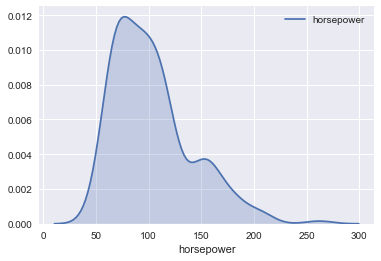

In [40]:
# confirmed your selection with a normal distribution curve
sns.kdeplot(cars['horsepower'], shade=True)
plt.xlabel('horsepower')
sns.despine(left=True, bottom=True)

In [42]:
cars[['horsepower','horspower_binned']].head(20)

,horsepower,horspower_binned
0,111.0,medium
1,111.0,medium
2,154.0,medium
3,102.0,medium
4,115.0,medium
5,110.0,medium
6,110.0,medium
7,110.0,medium
8,140.0,medium
9,101.0,low


In [43]:
cars['horspower_binned'].value_counts()

low       115
medium     62
high       23
Name: horspower_binned, dtype: int64

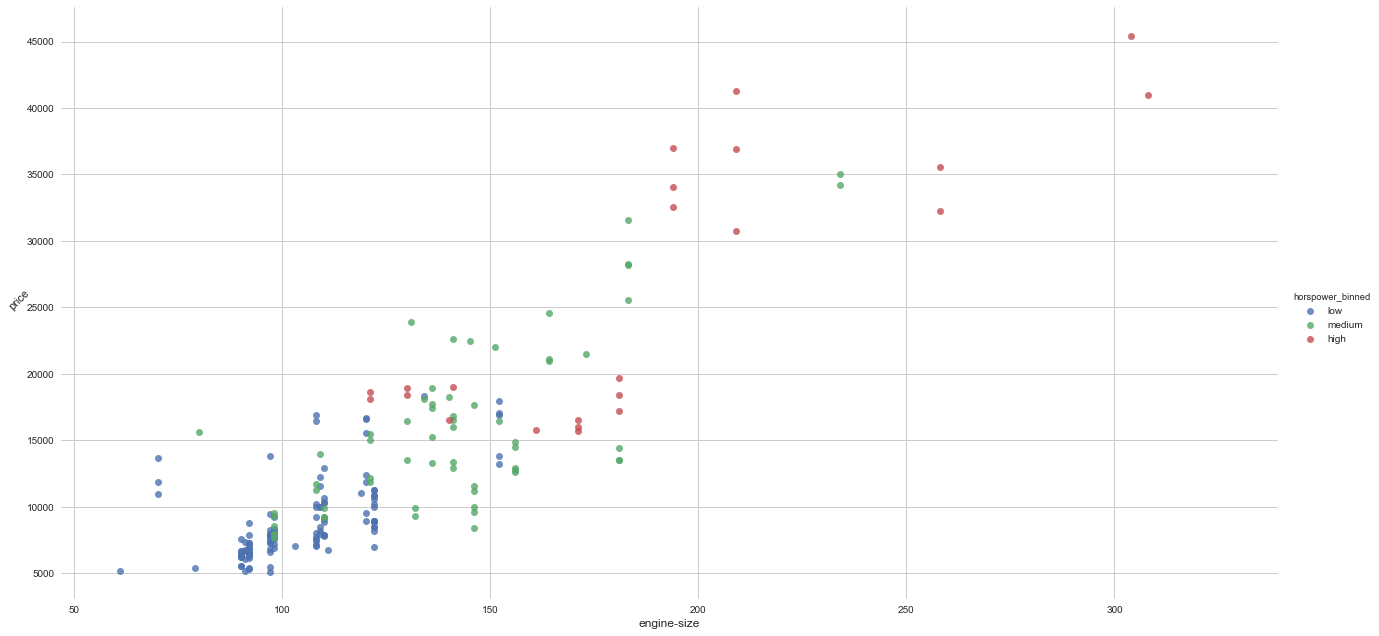

In [44]:
# how related is engine size to horse-power?
sns.set_style('whitegrid')
sns.lmplot(x='engine-size',y='price',data=cars,
           hue='horspower_binned',fit_reg=False,size=9,aspect=2)
plt.xlabel('engine-size', fontsize=12)
plt.ylabel('price', rotation=45)
sns.despine(left=True,bottom=True)

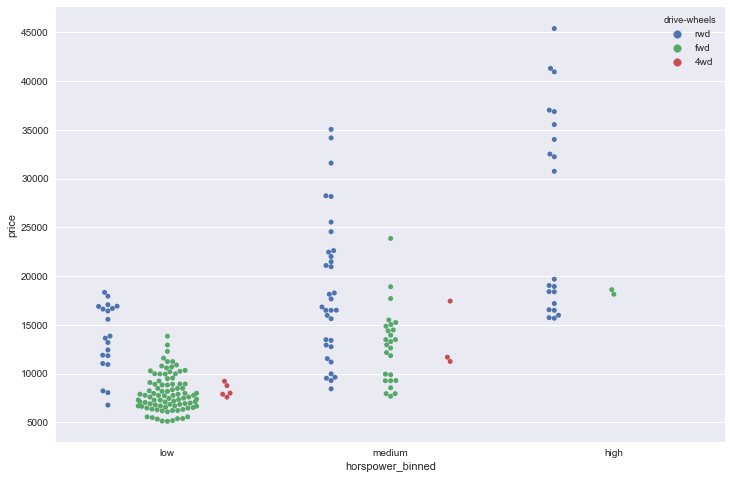

In [45]:
# how does the engine size dictates the type of drive wheels for selection
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = sns.swarmplot(x='horspower_binned', y='price', hue='drive-wheels',
                   data=cars, dodge=True)
sns.despine(left=True,bottom=True)


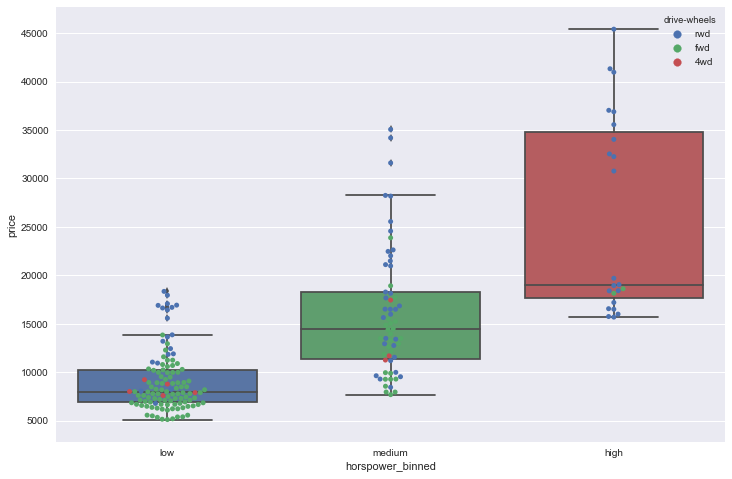

In [46]:
# there is likelihood to have a high price for car with high horsepower though many of the them have a lower price

plt.figure(figsize=(12,8))
a=sns.boxplot(x='horspower_binned',y='price',data=cars)
ax = sns.swarmplot(x='horspower_binned', y='price', hue='drive-wheels',
                   data=cars)
sns.despine(left=True,bottom=True)

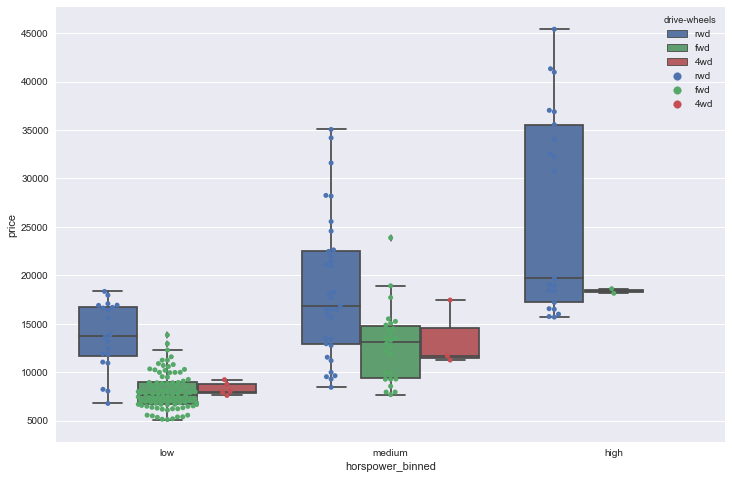

In [47]:
plt.figure(figsize=(12,8))
a=sns.boxplot(x='horspower_binned',y='price',hue='drive-wheels',data=cars)
ax = sns.swarmplot(x='horspower_binned', y='price', hue='drive-wheels',
                   data=cars, dodge=True)
sns.despine(left=True,bottom=True)

In [48]:
# get dummies(indicator) variable for categorical variable 
for a in ['fuel-type','aspiration']:
    
    dummies_variable=pd.get_dummies(cars[a],prefix=a)
    # concatenate the dummies variable with the dataframe
    cars = (pd.concat([cars,dummies_variable],axis=1)
            .drop(a,axis=1))

In [49]:
cars.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_L/100km,highway_L/100km,horspower_binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0


### Exploratory Data Analysis
***Question in mind is: "What are the main characteristics which have the most impact on the car price?". ***

In [50]:
cars.shape

(201, 31)

In [51]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 no

In [52]:
# get correlation between variables and set those less than 0.25 to 0  
cars_corr=cars.corr().applymap(lambda x: x if abs(x)>0.25 else 0)
cars_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_L/100km,highway_L/100km,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,0.000000,-0.550160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.279719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
normalized-losses,0.466264,1.000000,0.000000,0.000000,0.000000,-0.373737,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wheel-base,-0.535987,0.000000,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.0,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.000000,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.0,0.000000,0.579731,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.000000,0.000000,0.000000,0.000000
width,0.000000,0.000000,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.0,0.000000,0.615006,0.000000,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.000000,0.000000,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.000000,0.000000,0.0,0.259737,0.000000,-0.309913,0.000000,0.000000,0.000000,0.000000,0.000000,0.281578,-0.281578,0.000000,0.000000
curb-weight,0.000000,0.000000,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.0,0.000000,0.757994,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.000000,0.000000,-0.321955,0.321955
engine-size,0.000000,0.000000,0.572027,0.685025,0.729436,0.000000,0.849072,1.000000,0.572516,0.0,0.000000,0.822649,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.000000,0.000000,0.000000,0.000000
bore,0.000000,0.000000,0.493203,0.608941,0.544879,0.000000,0.644041,0.572516,1.000000,0.0,0.000000,0.566838,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.000000,0.000000,0.000000,0.000000
stroke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<function matplotlib.pyplot.text>

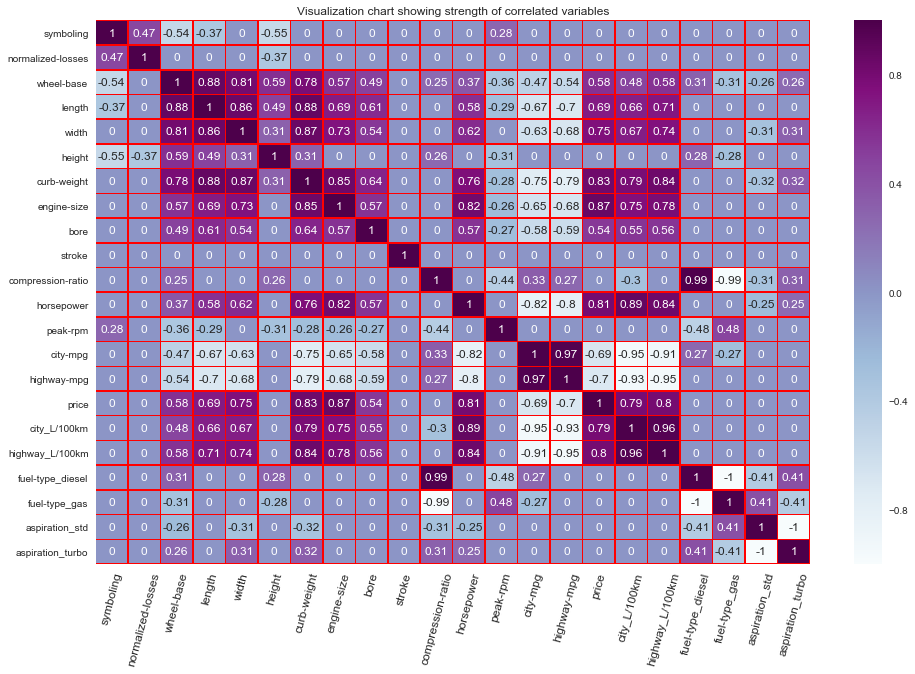

In [53]:
### visualizing the correlation
plt.figure(figsize=(16,10))
plt.title('Visualization chart showing strength of correlated variables')
a=sns.heatmap(cars_corr,cmap='BuPu',annot=True,
             linewidths=.5,linecolor='red')
plt.setp(a.get_xticklabels(), fontsize=12,rotation=75)
plt.text # to hid the default text that always show before the chart

In [55]:
# re-arrange to make price positioned as the alst column
cars_corr_sorted = cars_corr.reindex(columns=( list([a for a in cars_corr.columns if a != 'price']) +['price'] ),
                      index=( list([a for a in cars_corr.columns if a != 'price']) +['price']))
# cars_corr.reindex(['price'],axis=1)

In [56]:
cars_corr_sorted

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city_L/100km,highway_L/100km,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,price
symboling,1.000000,0.466264,-0.535987,-0.365404,0.000000,-0.550160,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.279719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
normalized-losses,0.466264,1.000000,0.000000,0.000000,0.000000,-0.373737,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wheel-base,-0.535987,0.000000,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.0,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889,0.584642
length,-0.365404,0.000000,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.0,0.000000,0.579731,-0.286035,-0.665192,-0.698142,0.657373,0.707108,0.000000,0.000000,0.000000,0.000000,0.690628
width,0.000000,0.000000,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.0,0.000000,0.615006,0.000000,-0.633531,-0.680635,0.673363,0.736728,0.000000,0.000000,-0.305732,0.305732,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.000000,0.000000,0.0,0.259737,0.000000,-0.309913,0.000000,0.000000,0.000000,0.000000,0.281578,-0.281578,0.000000,0.000000,0.000000
curb-weight,0.000000,0.000000,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.0,0.000000,0.757994,-0.279350,-0.749543,-0.794889,0.785353,0.836921,0.000000,0.000000,-0.321955,0.321955,0.834415
engine-size,0.000000,0.000000,0.572027,0.685025,0.729436,0.000000,0.849072,1.000000,0.572516,0.0,0.000000,0.822649,-0.256753,-0.650546,-0.679571,0.745059,0.783465,0.000000,0.000000,0.000000,0.000000,0.872335
bore,0.000000,0.000000,0.493203,0.608941,0.544879,0.000000,0.644041,0.572516,1.000000,0.0,0.000000,0.566838,-0.267338,-0.582121,-0.591390,0.554726,0.559197,0.000000,0.000000,0.000000,0.000000,0.543154
stroke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<function matplotlib.pyplot.text>

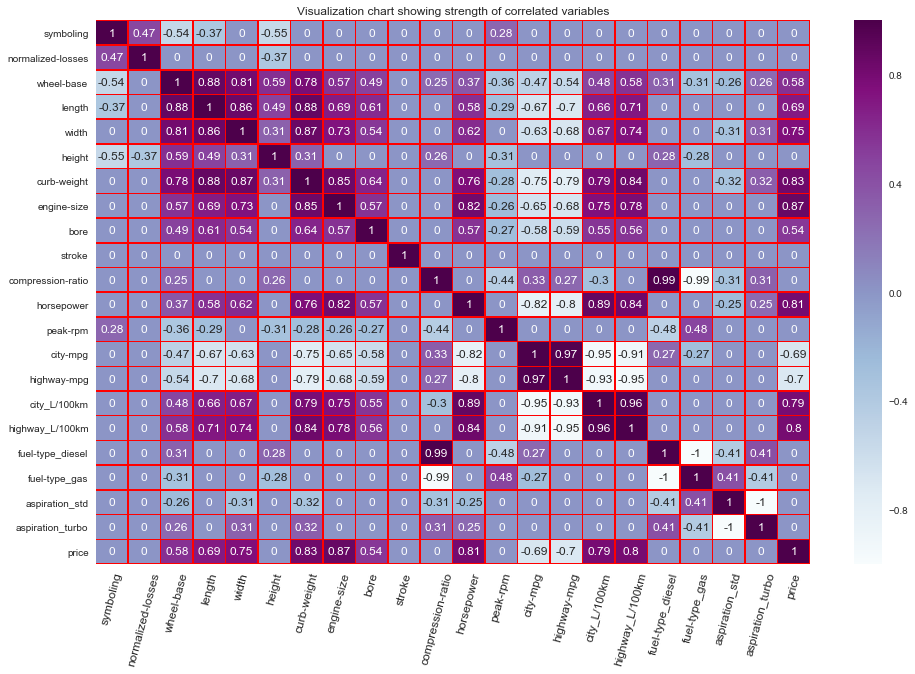

In [57]:
### visualizing the correlation
plt.figure(figsize=(16,10))
plt.title('Visualization chart showing strength of correlated variables')
a=sns.heatmap(cars_corr_sorted,cmap='BuPu',annot=True,
             linewidths=.5,linecolor='red')
plt.setp(a.get_xticklabels(), fontsize=12,rotation=75)
plt.text # to hidden the default text that always show before the chart

In [58]:
# select variables that have good correlation with price
correlated_var=cars_corr.loc[cars_corr.price != 0 ,'price']
correlated_var.to_frame()

,price
wheel-base,0.584642
length,0.690628
width,0.751265
curb-weight,0.834415
engine-size,0.872335
bore,0.543154
horsepower,0.809681
city-mpg,-0.686571
highway-mpg,-0.704692
price,1.000000


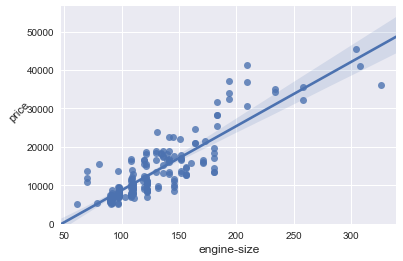

In [59]:
# visualizing the correlation between price and engine-size
sns.regplot(x='engine-size',y='price',data=cars)
plt.ylim(0,)
plt.xlabel('engine-size', fontsize=12)
plt.ylabel('price', rotation=45)
sns.despine(left=True,bottom=True)

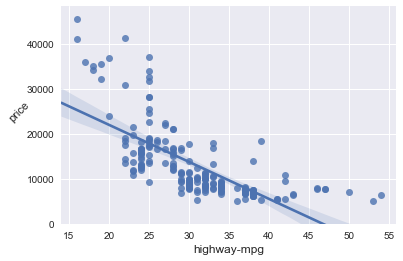

In [60]:
# visualizing the correlation between price and highway-mpg
sns.regplot(x='highway-mpg',y='price',data=cars)
plt.ylim(0,)
plt.xlabel('highway-mpg', fontsize=12)
plt.ylabel('price', rotation=45)
sns.despine(left=True,bottom=True)

          peak-rpm     price
peak-rpm  1.000000 -0.101542
price    -0.101542  1.000000


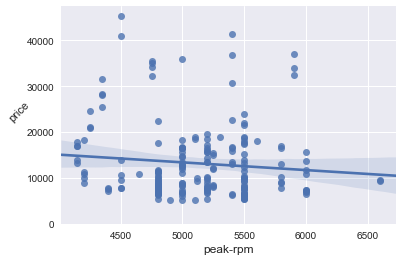

In [61]:
# visualizing a weak correlation
print(cars[['peak-rpm','price']].corr())

sns.regplot(x='peak-rpm',y='price',data=cars)
plt.ylim(0,)
plt.xlabel('peak-rpm',fontsize=12)
plt.ylabel('price', rotation=45)
sns.despine(left=True,bottom=True)

          stroke     price
stroke  1.000000  0.082267
price   0.082267  1.000000


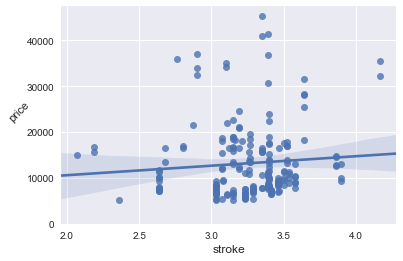

In [62]:
# visualizing a weak positive correlation
print(cars[["stroke","price"]].corr())

sns.regplot(x='stroke',y='price',data=cars)
plt.ylim(0,)
plt.xlabel('stroke', fontsize=12)
plt.ylabel('price', rotation=45)

sns.despine(left=True,bottom=True)

***Examining the certainty of our correlation***

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation 


In [63]:
correlated_var.index

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg', 'price', 'city_L/100km',
       'highway_L/100km'],
      dtype='object')

In [64]:
# intersted in obtaining the significant of the correlation estimate.

for a in correlated_var.index:
    pearson_coef, p_value = stats.pearsonr(cars[a], cars['price'])
    print(f''' The Pearson correlation coeff. for {a} 
          is {round(pearson_coef,2)} and the p_value is {p_value}''')

 The Pearson correlation coeff. for wheel-base 
          is 0.58 and the p_value is 8.076488270732955e-20
 The Pearson correlation coeff. for length 
          is 0.69 and the p_value is 8.016477466158713e-30
 The Pearson correlation coeff. for width 
          is 0.75 and the p_value is 9.20033551048166e-38
 The Pearson correlation coeff. for curb-weight 
          is 0.83 and the p_value is 2.1895772388936997e-53
 The Pearson correlation coeff. for engine-size 
          is 0.87 and the p_value is 9.265491622197996e-64
 The Pearson correlation coeff. for bore 
          is 0.54 and the p_value is 8.051208825441229e-17
 The Pearson correlation coeff. for horsepower 
          is 0.81 and the p_value is 6.058444649710872e-48
 The Pearson correlation coeff. for city-mpg 
          is -0.69 and the p_value is 2.3211320655676368e-29
 The Pearson correlation coeff. for highway-mpg 
          is -0.7 and the p_value is 1.7495471144476807e-31
 The Pearson correlation coeff. for price 
     

In [65]:
# intersted in obtaining the significant of the correlation estimate.

corr_list=[stats.pearsonr(cars[a], cars['price']) for a in correlated_var.index]


In [66]:
# displaying it as a table
pd.DataFrame(corr_list,columns=['corr_coef', 'P_values'], index=correlated_var.index)

,corr_coef,P_values
wheel-base,0.584642,8.076488e-20
length,0.690628,8.016477e-30
width,0.751265,9.200336e-38
curb-weight,0.834415,2.189577e-53
engine-size,0.872335,9.265492e-64
bore,0.543154,8.051209e-17
horsepower,0.809681,6.058445e-48
city-mpg,-0.686571,2.321132e-29
highway-mpg,-0.704692,1.749547e-31
price,1.000000,0.000000e+00


In [67]:
# explore the descriptive summary of object and categorical variables
cars.describe(include=['O','category'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horspower_binned
count,201,201,201,201,201,201,201,201,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,115


<function matplotlib.pyplot.text>

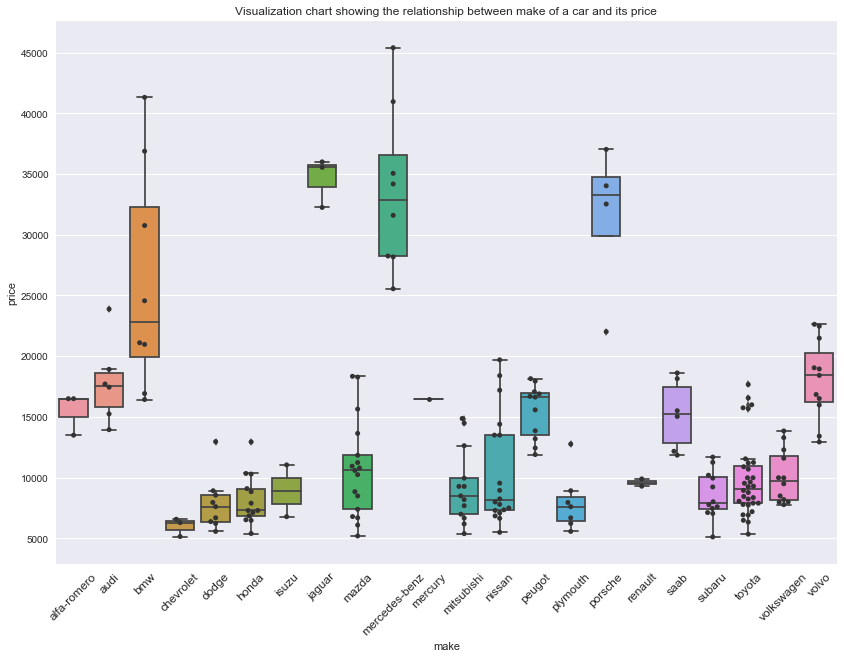

In [68]:
# visualizing the relationship between make of a car and its price
plt.figure(figsize=(14,10))
plt.title('Visualization chart showing the relationship between make of a car and its price')
a=sns.boxplot(x='make',y='price',data=cars)
a = sns.swarmplot(x="make", y="price", data=cars, color=".2")

a.set_xticklabels(a.get_xticklabels(),rotation=45, fontsize=12)
sns.despine(left=True,bottom=True)
plt.text # to hid the default text that always show before the chart

<function matplotlib.pyplot.text>

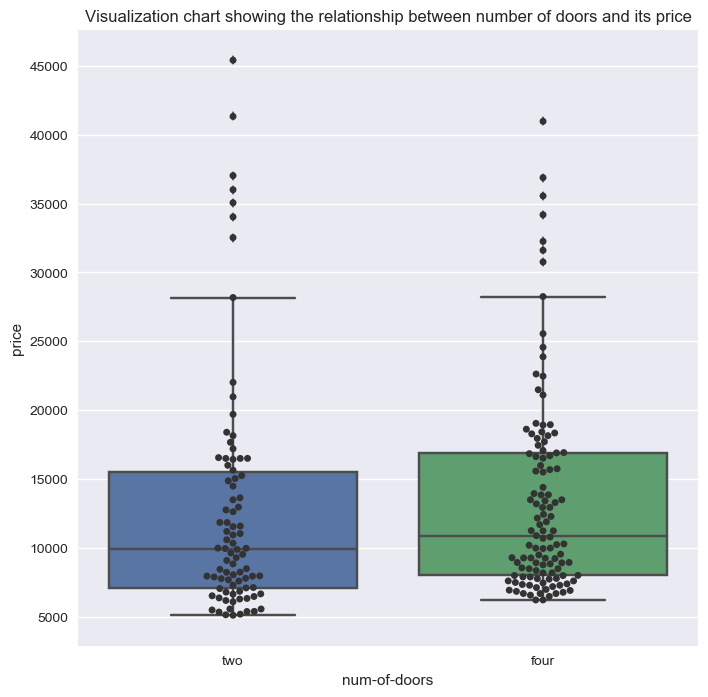

In [296]:
# visualizing the relationship between number of doors and price
plt.figure(figsize=(8,8))
a=sns.boxplot(x='num-of-doors',y='price',data=cars)
a = sns.swarmplot(x='num-of-doors', y="price", data=cars, color=".2")
plt.setp(a.get_xticklabels(), rotation=0)
plt.title('Visualization chart showing the relationship between number of doors and its price')
sns.despine(left=True,bottom=True)
plt.text# to hid the default text that always show before the chart

<function matplotlib.pyplot.text>

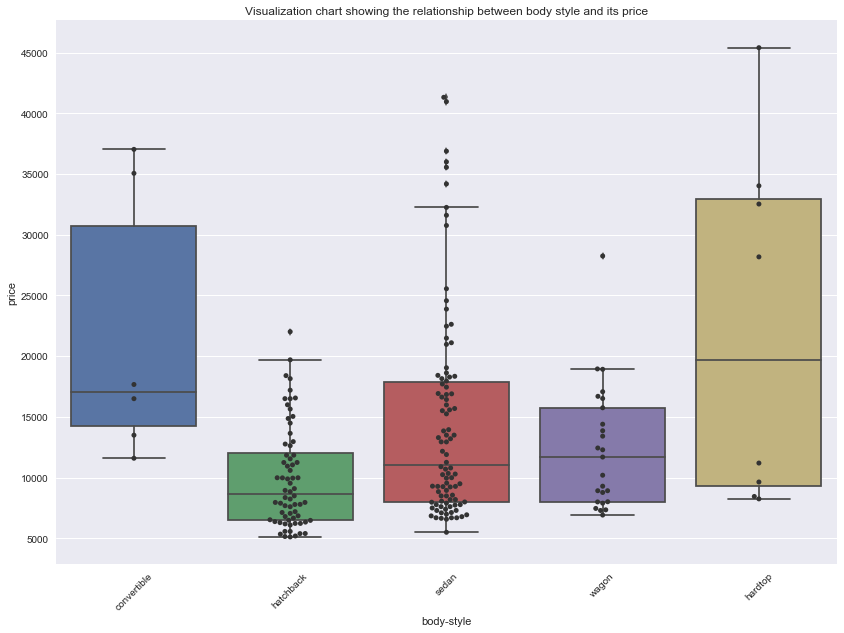

In [109]:
# visualizing relationship between body style and price
plt.figure(figsize=(14,10))
a=sns.boxplot(x='body-style',y='price',data=cars,notch=False)
a = sns.swarmplot(x='body-style', y="price", data=cars, color=".2")
plt.setp(a.get_xticklabels(), rotation=45)
sns.despine(left=True,bottom=True)
plt.title('Visualization chart showing the relationship between body style and its price')
plt.text

The distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price

<function matplotlib.pyplot.text>

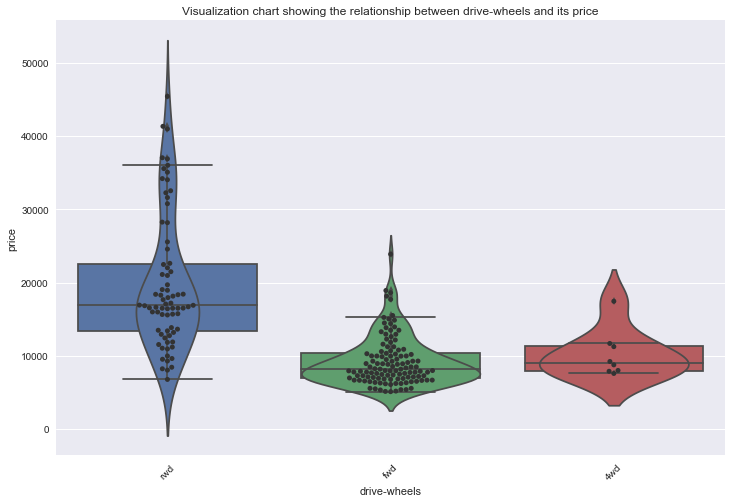

In [113]:
# visualizing relationship between drive-wheels and price
plt.figure(figsize=(12,8))
a=sns.boxplot(x='drive-wheels',y='price',data=cars)
a= sns.violinplot(x='drive-wheels',y='price',data=cars, inner=None)
a = sns.swarmplot(x='drive-wheels', y="price", data=cars, color=".2")
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Visualization chart showing the relationship between drive-wheels and its price')
plt.text

The distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

In [225]:
dict_of_value_counts['fuel-system']

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

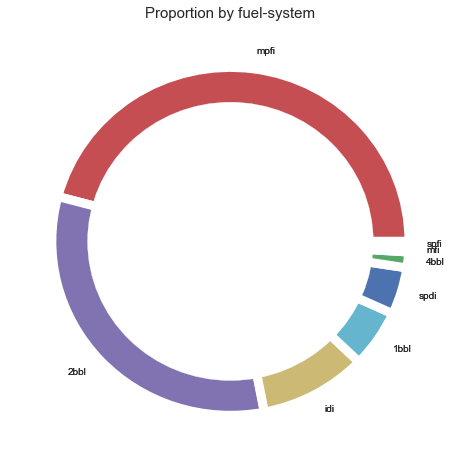

In [244]:
plt.figure(figsize=(8,8))
# create data
# names='groupA', 'groupB', 'groupC', 'groupD',
names= dict_of_value_counts['fuel-system'].index
size=dict_of_value_counts['fuel-system'].values
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.pie(size, labels=names)
plt.title('Proportion by fuel-system',fontsize=15)
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 9, 'edgecolor' : 'white' })
plt.setp(my_circle.get_label(), rotation=45)
p=plt.gcf()
p.gca().add_artist(my_circle)


<function matplotlib.pyplot.text>

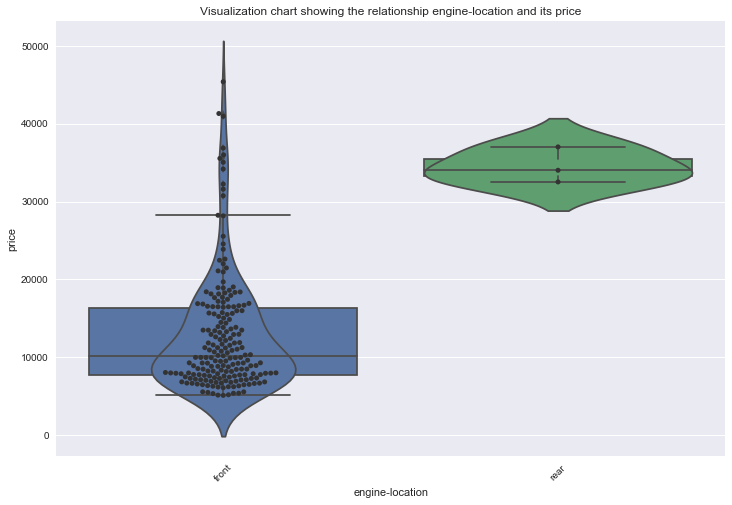

In [253]:
# visualizing relationship between drive-wheels and price
plt.figure(figsize=(12,8))
a=sns.boxplot(x='engine-location',y='price',data=cars)
a= sns.violinplot(x='engine-location',y='price',data=cars, inner=None)
a = sns.swarmplot(x='engine-location', y="price", data=cars, color=".2")
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Visualization chart showing the relationship engine-location and its price')
plt.text

Text(0.5,1,'Visualization chart showing the relationship engine-location and its price')

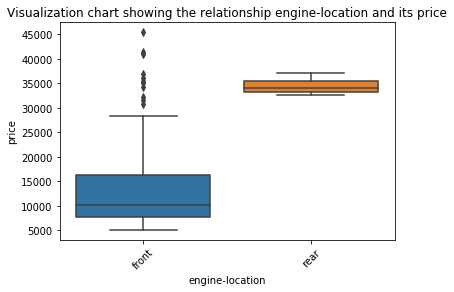

In [61]:
# visualizing relationship between engine-location and price
a=sns.boxplot(x='engine-location',y='price',data=cars)
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Visualization chart showing the relationship engine-location and its price')

The distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<function matplotlib.pyplot.text>

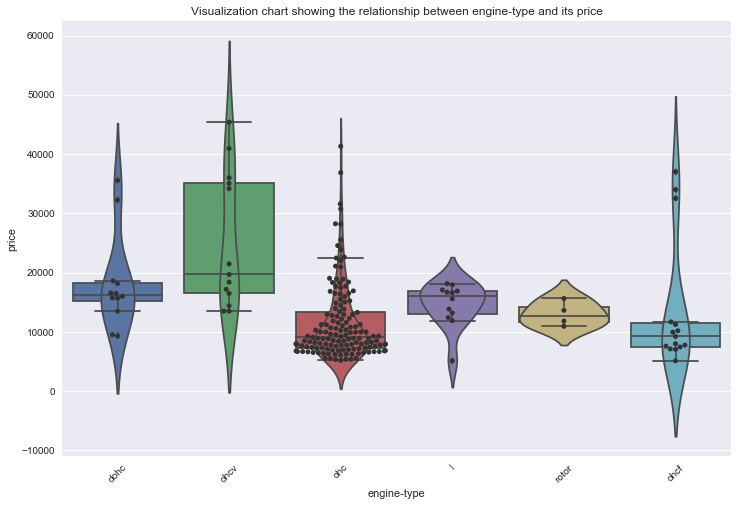

In [254]:
# visualizing relationship between drive-wheels and price
plt.figure(figsize=(12,8))
a=sns.boxplot(x='engine-type',y='price',data=cars)
a= sns.violinplot(x='engine-type',y='price',data=cars, inner=None)
a = sns.swarmplot(x='engine-type', y="price", data=cars, color=".2")
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Visualization chart showing the relationship between engine-type and its price')
plt.text

<function matplotlib.pyplot.text>

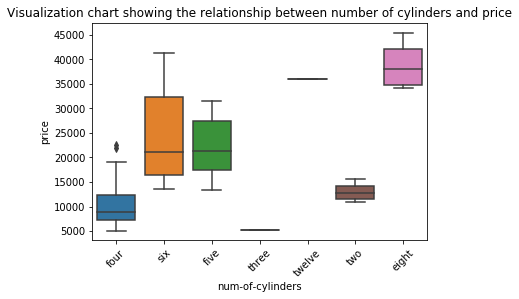

In [63]:
# visualizing relationship between number of cylinders and price
a=sns.boxplot(x='num-of-cylinders',y='price',data=cars)
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Visualization chart showing the relationship between number of cylinders and price')
plt.text

In [64]:
cars['engine-type'].value_counts().values

array([145,  15,  13,  12,  12,   4], dtype=int64)

<BarContainer object of 6 artists>

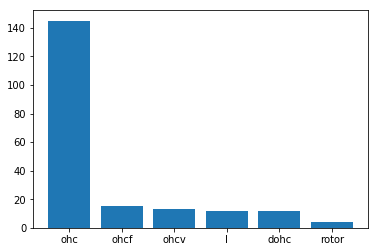

In [65]:
plt.bar( cars['engine-type'].value_counts().index, cars['engine-type'].value_counts().values)

<function matplotlib.pyplot.text>

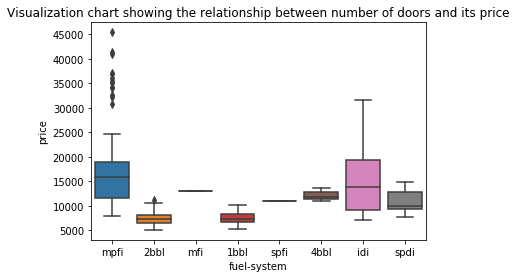

In [66]:
# visualizing relationship between number of doors and price
a=sns.boxplot(x='fuel-system',y='price',data=cars)
plt.setp(a.get_xticklabels(), rotation=0)
plt.title('Visualization chart showing the relationship between number of doors and its price')
plt.text

* Only `engine-location` show a strong indicators 
* while `makes`,`drive-wheels`,`num-of-cylinders`,`engine-type` show a potential indicator

In [67]:
# getting the value counts 
cars['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


In [68]:
for a in ['make','drive-wheels','num-of-cylinders','engine-type']:
    print(cars[a].value_counts())

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64


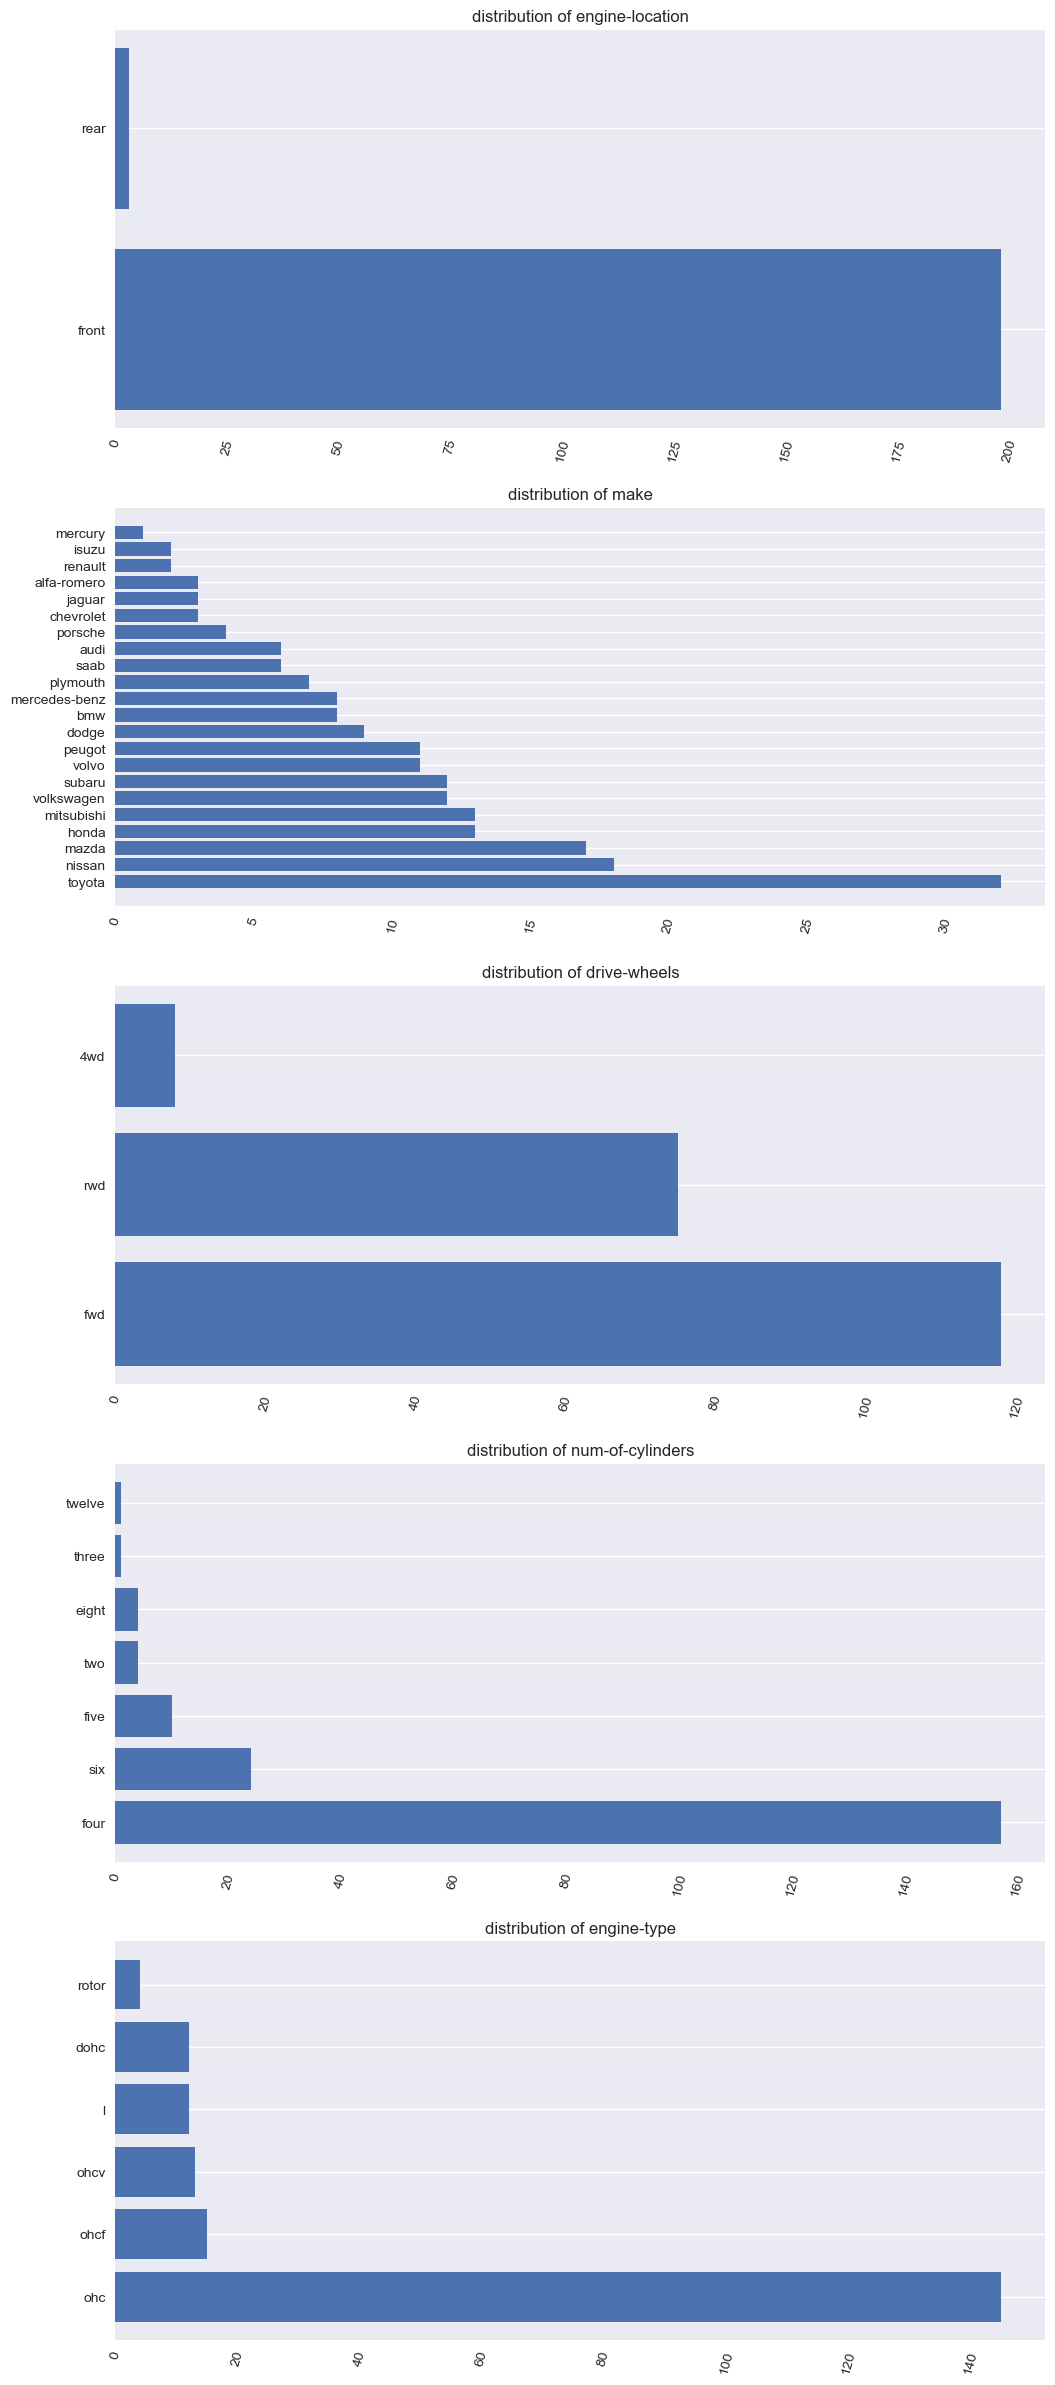

In [299]:
# visualizing the value counts
fig = plt.figure(figsize=(12,30))
for u,v in enumerate(['engine-location','make','drive-wheels','num-of-cylinders','engine-type']):
    ax = fig.add_subplot(5,1,u+1)
    ax.barh(cars[v].value_counts().index,cars[v].value_counts().values)
#     ax.grid(which='both',axis='x')
#     ax.minorticks_on()
#     ax.pie(cars[v].value_counts().values,labels=cars[v].value_counts().index,radius=0.5)
    plt.title(f'distribution of {v}')
    plt.setp(ax.get_xticklabels(), rotation=75)
    sns.despine(left=True,bottom=True)

Examining the value counts of the `engine location` would not be a good predictor variable for the `price`. This is because we only have `three cars with a rear engine and 198 with an engine in the front`, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

We are left with `make`,`drive-wheels`,`num-of-cylinders`,`engine-type` to obtain a meaningful insight

In [70]:
# using grouping of variables to make a better sense
cars_group1 = cars[['drive-wheels','body-style','price']]

In [71]:
cars_group1.groupby(['drive-wheels'],as_index=False).agg(['min','max','mean'])

price                       
                 min      max          mean
drive-wheels                               
4wd           7603.0  17450.0  10241.000000
fwd           5118.0  23875.0   9244.779661
rwd           6785.0  45400.0  19757.613333

In [72]:
test_group1=(cars_group1.groupby(['drive-wheels','body-style']
                                 ,as_index=False).agg(['min','max','mean']))
test_group1

price                       
                              min      max          mean
drive-wheels body-style                                 
4wd          hatchback     7603.0   7603.0   7603.000000
             sedan         9233.0  17450.0  12647.333333
             wagon         7898.0  11694.0   9095.750000
fwd          convertible  11595.0  11595.0  11595.000000
             hardtop       8249.0   8249.0   8249.000000
             hatchback     5118.0  18150.0   8396.387755
             sedan         5499.0  23875.0   9811.800000
             wagon         6918.0  18920.0   9997.333333
rwd          convertible  13495.0  37028.0  23949.600000
             hardtop       8449.0  45400.0  24202.714286
             hatchback     8238.0  22018.0  14337.777778
             sedan         6785.0  41315.0  21711.833333
             wagon        12440.0  28248.0  16994.222222

* *It seems that `convertible` and `hardtop` `bodystyle` are missing for `4wd`.*
* *It means no instance where `drive-wheels` is `4wd` and `body-style` is either `convertible` or `hardtop`*

In [73]:
test_group2=(cars_group1.groupby(['drive-wheels','body-style']
                                 ,as_index=False).mean())
test_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [74]:
# displaying it as a pivot table
test_group2_pivoted=test_group2.pivot_table(index='drive-wheels',columns='body-style')
test_group2_pivoted

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [75]:
# fill missing values with 0
test_group2_pivoted = test_group2_pivoted.fillna(0)
test_group2_pivoted

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

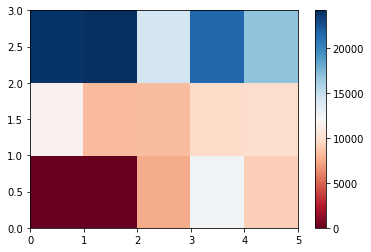

In [76]:
# visualizing the relationship between drive-wheels and body-styles vs price
# with matplotlib, the process is very long
plt.pcolor(test_group2_pivoted,cmap='RdBu')
plt.colorbar()

In [77]:
test_group2_pivoted.columns

MultiIndex(levels=[['price'], ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'body-style'])

In [78]:
test_group2_pivoted.index.name

'drive-wheels'

In [79]:
test_group2_pivoted.columns.levels[1].names

FrozenList(['body-style'])

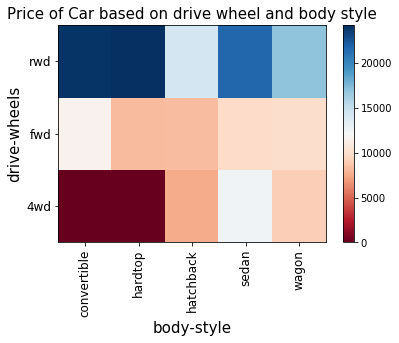

In [80]:
# giving the heatmap some aesthetics
fig, ax = plt.subplots()
im=ax.pcolor(test_group2_pivoted,cmap='RdBu') #or use cmap='Blues_r'
# label name
row_label = test_group2_pivoted.columns.levels[1]
column_label = test_group2_pivoted.index

# definining ticks position
major_ticks = np.arange(test_group2_pivoted.shape[0])+0.5
minor_ticks = np.arange(test_group2_pivoted.shape[1])+0.5

# move tick and label to the centre
ax.set_xticks(minor_ticks,minor=False)
ax.set_yticks(major_ticks,minor=False)

# insert tick labels and label
ax.set_xticklabels(row_label,minor=False, fontsize=12)
ax.set_yticklabels(column_label,minor=False, fontsize=12)

ax.set_xlabel(test_group2_pivoted.columns.levels[1].name, fontsize=15)
ax.set_ylabel(test_group2_pivoted.index.name, fontsize=15)

# set title
ax.set_title('Price of Car based on drive wheel and body style', fontsize=15)
# rotate tick label
plt.xticks(rotation=90)

fig.colorbar(im)



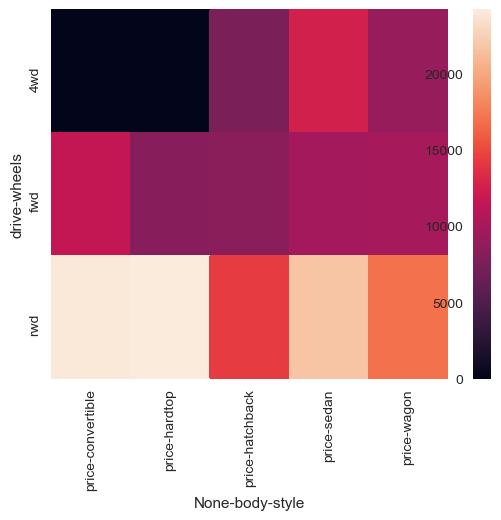

In [303]:
# visualization with seaborn (very easy approach)
# testing the default plotting parameter
sns.heatmap(test_group2_pivoted)
sns.despine(left=True,bottom=True)

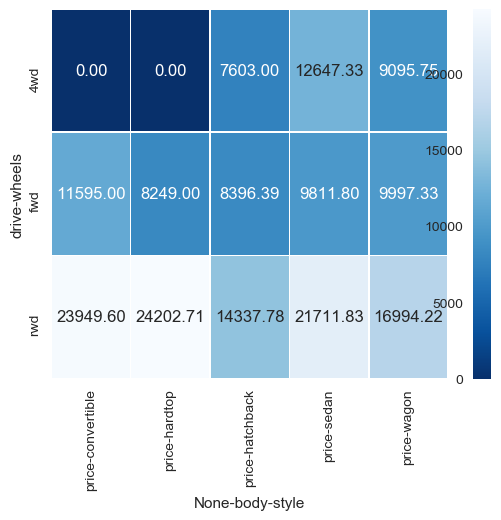

In [301]:
sns.heatmap(test_group2_pivoted,cmap='Blues_r',
            annot=True, fmt='.2f',linewidths=.5)
sns.despine(left=True,bottom=True)

Text(0.5,15,'body-style')

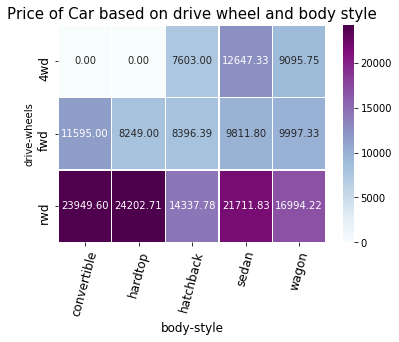

In [83]:

plt.title('Price of Car based on drive wheel and body style', fontsize=15)
a=sns.heatmap(test_group2_pivoted,cmap='BuPu',
            annot=True, fmt='.2f',linewidths=.5,
           xticklabels=test_group2_pivoted.columns.levels[1])
plt.setp(a.get_xticklabels(), fontsize=12,rotation=75)
plt.setp(a.get_yticklabels(), fontsize=12, rotation=90)
plt.xlabel(test_group2_pivoted.columns.levels[1].name,fontsize=12)

***Finding the actual correlation between categorical variable with `ANOVA`***

*why `ANOVA`*: **finding the correlation between different groups of a categorical variable**

In [84]:
car_make_price=cars[['make','price']]
av_price_per_make=(car_make_price.groupby('make'
                                 ,as_index=False).mean())
av_price_per_make

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


<function matplotlib.pyplot.text>

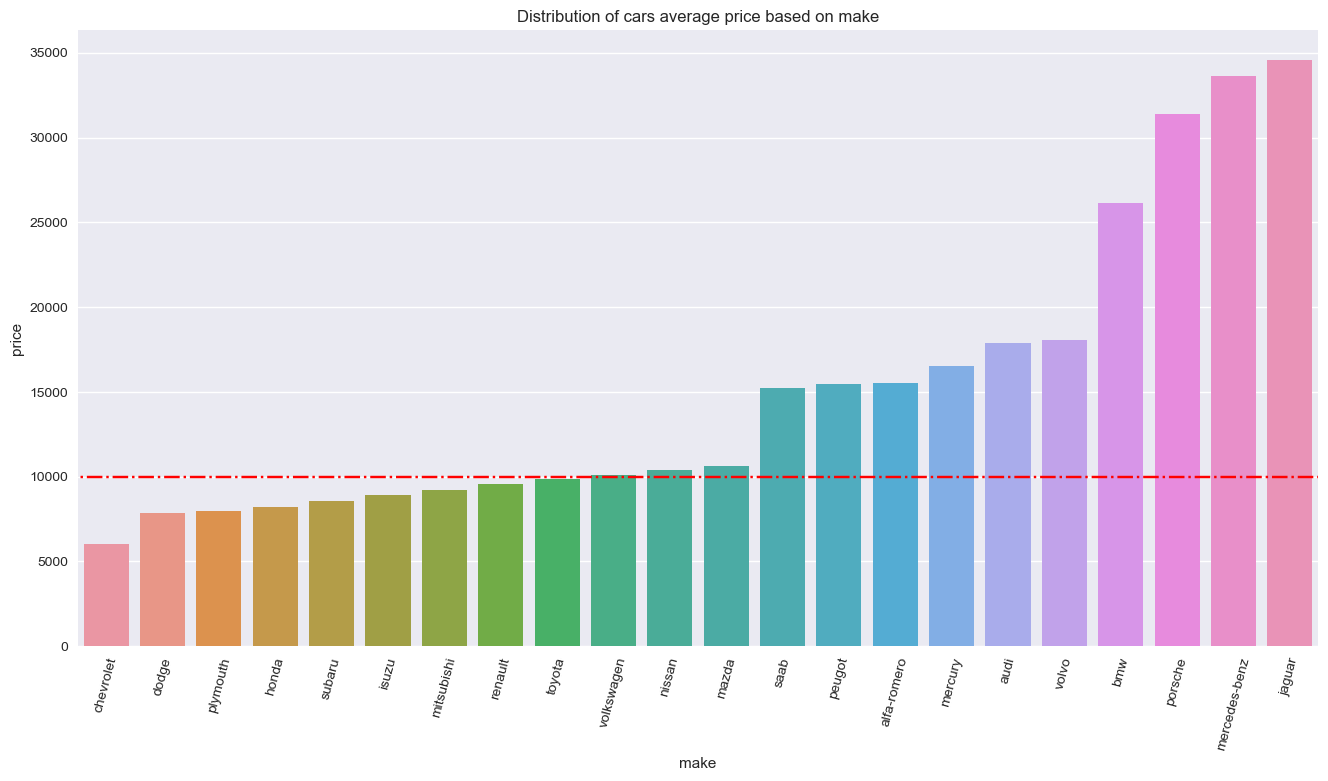

In [304]:
# sns.countplot(x='make',data=av_price_per_make)
# av_price_per_make.sort_values('price')
plt.figure(figsize=(16,8))
a=sns.barplot(x='make',y='price',data=av_price_per_make.sort_values('price'))
plt.setp(a.get_xticklabels(), rotation=75)
plt.title('Distribution of car''s average price based on make')
plt.hlines(y=10000,xmin=-20,xmax=120,colors='r',linestyles='dashdot')
plt.grid(which='minor',axis='y',color='b',visible=True)
sns.despine(left=True,bottom=True)
plt.text

In [86]:
# group by drive-wheel
cars_group2 = cars[['drive-wheels','price']].groupby('drive-wheels')
cars_group2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [87]:
cars_group2

In [88]:
cars_group2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [89]:
# performing ANOVA test
f_val, p_val = stats.f_oneway(cars_group2.get_group('4wd')['price'],
                             cars_group2.get_group('fwd')['price'],
                             cars_group2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [90]:
# let examine if these three group are highly correlated by perfoming ANOVA seperately

f_val, p_val = stats.f_oneway(cars_group2.get_group('4wd')['price'],
                             cars_group2.get_group('fwd')['price'])

print( "ANOVA results for 4wd and fwd: F=", f_val, ", P =", p_val)

ANOVA results for 4wd and fwd: F= 0.665465750252303 , P = 0.41620116697845666


In [91]:
# let examine if these three group are highly correlated by perfoming ANOVA seperately

f_val, p_val = stats.f_oneway(cars_group2.get_group('4wd')['price'],
                             cars_group2.get_group('rwd')['price'])

print( "ANOVA results for 4wd and rwd: F=", f_val, ", P =", p_val)

ANOVA results for 4wd and rwd: F= 8.580681368924756 , P = 0.004411492211225333


In [92]:
# let examine if these three group are highly correlated by perfoming ANOVA seperately

f_val, p_val = stats.f_oneway(cars_group2.get_group('rwd')['price'],
                             cars_group2.get_group('fwd')['price'])

print( "ANOVA results for rwd and fwd: F=", f_val, ", P =", p_val)

ANOVA results for rwd and fwd: F= 130.55331609591104 , P = 2.235530635567824e-23


In [93]:
dict_of_value_counts['drive-wheels']

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [94]:
# group by make
cars_group3 = cars[['make','price']].groupby('make')
cars_group3.head(2)

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
9,bmw,16430.0
10,bmw,16925.0
17,chevrolet,5151.0
18,chevrolet,6295.0
20,dodge,5572.0
21,dodge,6377.0


In [95]:
dict_of_value_counts['num-of-cylinders']

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

<function matplotlib.pyplot.text>

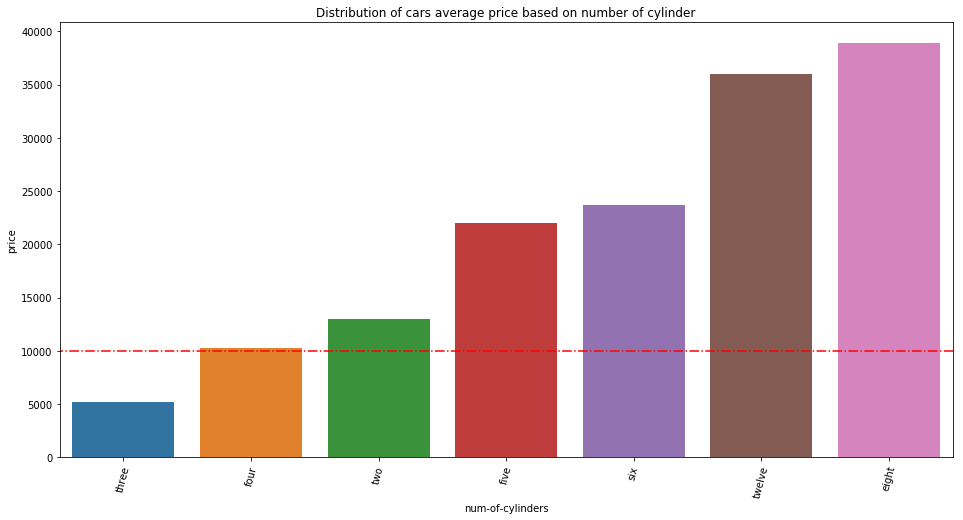

In [96]:
car_by_cylinder_price=cars[['num-of-cylinders','price']]
av_price_per_cylinder=(car_by_cylinder_price.groupby('num-of-cylinders'
                                 ,as_index=False).mean())

plt.figure(figsize=(16,8))
a=sns.barplot(x='num-of-cylinders',y='price',data=av_price_per_cylinder.sort_values('price'))
plt.setp(a.get_xticklabels(), rotation=75)
plt.title('Distribution of car''s average price based on number of cylinder')
plt.hlines(y=10000,xmin=-20,xmax=120,colors='r',linestyles='dashdot')
plt.grid(which='minor',axis='y',color='b',visible=True)
plt.text

In [97]:
# group by num-of-cylinders
cars_group3 = cars[['num-of-cylinders','price']].groupby('num-of-cylinders')

# performing ANOVA test
f_val, p_val = stats.f_oneway(cars_group3.get_group('four')['price'],
                             cars_group3.get_group('six')['price'],
                             cars_group3.get_group('five')['price'],
                             cars_group3.get_group('three')['price'],
                             cars_group3.get_group('two')['price'],
                             cars_group3.get_group('twelve')['price'],
                             cars_group3.get_group('eight')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 54.9436530466324 , P = 2.8701445428124514e-39


<function matplotlib.pyplot.text>

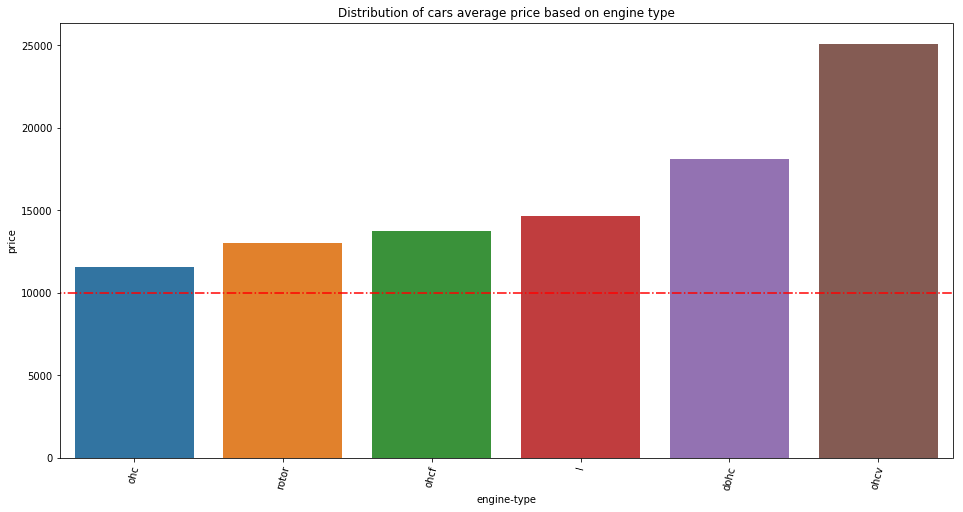

In [98]:
car_by_engine_type_price=cars[['engine-type','price']]
av_price_per_engine_type=(car_by_engine_type_price.groupby('engine-type'
                                 ,as_index=False).mean())

plt.figure(figsize=(16,8))
a=sns.barplot(x='engine-type',y='price',data=av_price_per_engine_type.sort_values('price'))
plt.setp(a.get_xticklabels(), rotation=75)
plt.title('Distribution of car''s average price based on engine type')
plt.hlines(y=10000,xmin=-20,xmax=120,colors='r',linestyles='dashdot')
plt.grid(which='minor',axis='y',color='b',visible=True)
plt.text

## Conclusion: Important Variables

***We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:***

**Continuous numerical variables:**
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* city_L/100km
* highway_L/100km
* Wheel-base
* Bore

**Categorical variables:**
* Drive-wheels
* Num-of-cylinders

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.
